# **Uber and Lyft Dataset Boston MA**

---

## ***Introduction***

---

By [Darly Guntur Darris Purba](https://github.com/DarlyP)

![UberLyft](UberLyft.jpeg)

Data : [Uber and Lyft Dataset Boston, MA](https://www.kaggle.com/datasets/brllrb/uber-and-lyft-dataset-boston-ma)

---

## **Objektif**

---

Sebagai perusahaan penyedia layanan taksi seperti Lyft atau Uber, memahami faktor-faktor yang mempengaruhi harga layanan sangat penting untuk meningkatkan strategi penetapan harga dan daya saing di pasar. Dengan menggunakan analisis Linear Regression pada dataset dari Kaggle, perusahaan dapat mengidentifikasi bagaimana parameter-parameter tertentu, seperti waktu pemesanan, lokasi penjemputan, dan kondisi lalu lintas, mempengaruhi harga taksi. Wawasan ini memungkinkan perusahaan untuk mengoptimalkan harga, menentukan strategi promosi yang efektif, meningkatkan kualitas layanan, memberikan estimasi harga yang akurat kepada pelanggan, dan mengelola armada taksi dengan lebih efisien.

---

## **Identifikasi Masalah:** 

---

Diberikan data `Uber and Lyft Dataset Boston, MA` yang bersumber dari Kaggle. Analisis dan buat model dengan menggunakan Linear Regression untuk memprediksi harga perjalanan pada platform *ride-hailing* dengan memperhatikan aspek:

- Asumsi Linear Regression

- *Slope* dan *intercept* 

---

## ***Import Libraries***

---

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import pickle
import json
from sklearn.preprocessing import OneHotEncoder, RobustScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, root_mean_squared_error
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import make_pipeline
from sklearn.decomposition import PCA
from statsmodels.stats.stattools import durbin_watson
from scipy import stats
from feature_engine.outliers import Winsorizer

---

## ***Data Loading***

---

In [2]:
# Membuka Data CSV
df = pd.read_csv('rideshare_kaggle.csv', na_values=['N/A', 'NA', 'NaN'], index_col=False)

In [3]:
# Menampilkan 5 Data Teratas
pd.options.display.max_columns = None
df.head(5)

,id,timestamp,hour,day,month,datetime,timezone,source,destination,cab_type,product_id,name,price,distance,surge_multiplier,latitude,longitude,temperature,apparentTemperature,short_summary,long_summary,precipIntensity,precipProbability,humidity,windSpeed,windGust,windGustTime,visibility,temperatureHigh,temperatureHighTime,temperatureLow,temperatureLowTime,apparentTemperatureHigh,apparentTemperatureHighTime,apparentTemperatureLow,apparentTemperatureLowTime,icon,dewPoint,pressure,windBearing,cloudCover,uvIndex,visibility.1,ozone,sunriseTime,sunsetTime,moonPhase,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,1.544953e+09,9,16,12,2018-12-16 09:30:07,America/New_York,Haymarket Square,North Station,Lyft,lyft_line,Shared,5.0,0.44,1.0,42.2148,-71.033,42.34,37.12,Mostly Cloudy,Rain throughout the day.,0.0000,0.0,0.68,8.66,9.17,1545015600,10.000,43.68,1544968800,34.19,1545048000,37.95,1544968800,27.39,1545044400,partly-cloudy-night,32.70,1021.98,57,0.72,0,10.000,303.8,1544962084,1544994864,0.30,0.1276,1544979600,39.89,1545012000,43.68,1544968800,33.73,1545012000,38.07,1544958000
1,4bd23055-6827-41c6-b23b-3c491f24e74d,1.543284e+09,2,27,11,2018-11-27 02:00:23,America/New_York,Haymarket Square,North Station,Lyft,lyft_premier,Lux,11.0,0.44,1.0,42.2148,-71.033,43.58,37.35,Rain,"Rain until morning, starting again in the eve...",0.1299,1.0,0.94,11.98,11.98,1543291200,4.786,47.30,1543251600,42.10,1543298400,43.92,1543251600,36.20,1543291200,rain,41.83,1003.97,90,1.00,0,4.786,291.1,1543232969,1543266992,0.64,0.1300,1543251600,40.49,1543233600,47.30,1543251600,36.20,1543291200,43.92,1543251600
2,981a3613-77af-4620-a42a-0c0866077d1e,1.543367e+09,1,28,11,2018-11-28 01:00:22,America/New_York,Haymarket Square,North Station,Lyft,lyft,Lyft,7.0,0.44,1.0,42.2148,-71.033,38.33,32.93,Clear,Light rain in the morning.,0.0000,0.0,0.75,7.33,7.33,1543334400,10.000,47.55,1543320000,33.10,1543402800,44.12,1543320000,29.11,1543392000,clear-night,31.10,992.28,240,0.03,0,10.000,315.7,1543319437,1543353364,0.68,0.1064,1543338000,35.36,1543377600,47.55,1543320000,31.04,1543377600,44.12,1543320000
3,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,1.543554e+09,4,30,11,2018-11-30 04:53:02,America/New_York,Haymarket Square,North Station,Lyft,lyft_luxsuv,Lux Black XL,26.0,0.44,1.0,42.2148,-71.033,34.38,29.63,Clear,Partly cloudy throughout the day.,0.0000,0.0,0.73,5.28,5.28,1543514400,10.000,45.03,1543510800,28.90,1543579200,38.53,1543510800,26.20,1543575600,clear-night,26.64,1013.73,310,0.00,0,10.000,291.1,1543492370,1543526114,0.75,0.0000,1543507200,34.67,1543550400,45.03,1543510800,30.30,1543550400,38.53,1543510800
4,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,1.543463e+09,3,29,11,2018-11-29 03:49:20,America/New_York,Haymarket Square,North Station,Lyft,lyft_plus,Lyft XL,9.0,0.44,1.0,42.2148,-71.033,37.44,30.88,Partly Cloudy,Mostly cloudy throughout the day.,0.0000,0.0,0.70,9.14,9.14,1543446000,10.000,42.18,1543420800,36.71,1543478400,35.75,1543420800,30.29,1543460400,partly-cloudy-night,28.61,998.36,303,0.44,0,10.000,347.7,1543405904,1543439738,0.72,0.0001,1543420800,33.10,1543402800,42.18,1543420800,29.11,1543392000,35.75,1543420800


In [4]:
# Menampilkan 5 Data Terbawah
df.tail(5)

,id,timestamp,hour,day,month,datetime,timezone,source,destination,cab_type,product_id,name,price,distance,surge_multiplier,latitude,longitude,temperature,apparentTemperature,short_summary,long_summary,precipIntensity,precipProbability,humidity,windSpeed,windGust,windGustTime,visibility,temperatureHigh,temperatureHighTime,temperatureLow,temperatureLowTime,apparentTemperatureHigh,apparentTemperatureHighTime,apparentTemperatureLow,apparentTemperatureLowTime,icon,dewPoint,pressure,windBearing,cloudCover,uvIndex,visibility.1,ozone,sunriseTime,sunsetTime,moonPhase,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
693066,616d3611-1820-450a-9845-a9ff304a4842,1.543708e+09,23,1,12,2018-12-01 23:53:05,America/New_York,West End,North End,Uber,6f72dfc5-27f1-42e8-84db-ccc7a75f6969,UberXL,13.0,1.0,1.0,42.3519,-71.0643,37.05,37.05,Partly Cloudy,Light rain in the morning and overnight.,0.0,0.0,0.74,2.34,2.87,1543672800,9.785,44.76,1543690800,34.83,1543712400,44.09,1543690800,35.48,1543712400,partly-cloudy-night,29.65,1023.57,133,0.31,0,9.785,271.5,1543665331,1543698855,0.82,0.0,1543683600,31.42,1543658400,44.76,1543690800,27.77,1543658400,44.09,1543690800
693067,633a3fc3-1f86-4b9e-9d48-2b7132112341,1.543708e+09,23,1,12,2018-12-01 23:53:05,America/New_York,West End,North End,Uber,55c66225-fbe7-4fd5-9072-eab1ece5e23e,UberX,9.5,1.0,1.0,42.3519,-71.0643,37.05,37.05,Partly Cloudy,Light rain in the morning and overnight.,0.0,0.0,0.74,2.34,2.87,1543672800,9.785,44.76,1543690800,34.83,1543712400,44.09,1543690800,35.48,1543712400,partly-cloudy-night,29.65,1023.57,133,0.31,0,9.785,271.5,1543665331,1543698855,0.82,0.0,1543683600,31.42,1543658400,44.76,1543690800,27.77,1543658400,44.09,1543690800
693068,64d451d0-639f-47a4-9b7c-6fd92fbd264f,1.543708e+09,23,1,12,2018-12-01 23:53:05,America/New_York,West End,North End,Uber,8cf7e821-f0d3-49c6-8eba-e679c0ebcf6a,Taxi,NaN,1.0,1.0,42.3519,-71.0643,37.05,37.05,Partly Cloudy,Light rain in the morning and overnight.,0.0,0.0,0.74,2.34,2.87,1543672800,9.785,44.76,1543690800,34.83,1543712400,44.09,1543690800,35.48,1543712400,partly-cloudy-night,29.65,1023.57,133,0.31,0,9.785,271.5,1543665331,1543698855,0.82,0.0,1543683600,31.42,1543658400,44.76,1543690800,27.77,1543658400,44.09,1543690800
693069,727e5f07-a96b-4ad1-a2c7-9abc3ad55b4e,1.543708e+09,23,1,12,2018-12-01 23:53:05,America/New_York,West End,North End,Uber,6d318bcc-22a3-4af6-bddd-b409bfce1546,Black SUV,27.0,1.0,1.0,42.3519,-71.0643,37.05,37.05,Partly Cloudy,Light rain in the morning and overnight.,0.0,0.0,0.74,2.34,2.87,1543672800,9.785,44.76,1543690800,34.83,1543712400,44.09,1543690800,35.48,1543712400,partly-cloudy-night,29.65,1023.57,133,0.31,0,9.785,271.5,1543665331,1543698855,0.82,0.0,1543683600,31.42,1543658400,44.76,1543690800,27.77,1543658400,44.09,1543690800
693070,e7fdc087-fe86-40a5-a3c3-3b2a8badcbda,1.543708e+09,23,1,12,2018-12-01 23:53:05,America/New_York,West End,North End,Uber,997acbb5-e102-41e1-b155-9df7de0a73f2,UberPool,10.0,1.0,1.0,42.3519,-71.0643,37.05,37.05,Partly Cloudy,Light rain in the morning and overnight.,0.0,0.0,0.74,2.34,2.87,1543672800,9.785,44.76,1543690800,34.83,1543712400,44.09,1543690800,35.48,1543712400,partly-cloudy-night,29.65,1023.57,133,0.31,0,9.785,271.5,1543665331,1543698855,0.82,0.0,1543683600,31.42,1543658400,44.76,1543690800,27.77,1543658400,44.09,1543690800


In [5]:
# Menampilan Data Pada Rentang Tertentu 
df.iloc[100:115]

,id,timestamp,hour,day,month,datetime,timezone,source,destination,cab_type,product_id,name,price,distance,surge_multiplier,latitude,longitude,temperature,apparentTemperature,short_summary,long_summary,precipIntensity,precipProbability,humidity,windSpeed,windGust,windGustTime,visibility,temperatureHigh,temperatureHighTime,temperatureLow,temperatureLowTime,apparentTemperatureHigh,apparentTemperatureHighTime,apparentTemperatureLow,apparentTemperatureLowTime,icon,dewPoint,pressure,windBearing,cloudCover,uvIndex,visibility.1,ozone,sunriseTime,sunsetTime,moonPhase,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
100,42dd31b8-d488-4de6-8dd1-544d6f943149,1.543444e+09,22,28,11,2018-11-28 22:26:07,America/New_York,South Station,Back Bay,Uber,8cf7e821-f0d3-49c6-8eba-e679c0ebcf6a,Taxi,NaN,2.49,1.0,42.3647,-71.0542,40.43,34.59,Overcast,Mostly cloudy throughout the day.,0.0000,0.00,0.64,9.08,12.72,1543431600,10.000,42.61,1543438800,37.60,1543489200,36.57,1543438800,32.12,1543478400,cloudy,29.27,994.99,295,1.00,0,10.000,354.8,1543405936,1543439716,0.72,0.0000,1543420800,33.85,1543399200,42.61,1543438800,30.03,1543399200,36.57,1543438800
101,c1463da2-43e9-4e83-a52f-eb4fbe9d85e6,1.543322e+09,12,27,11,2018-11-27 12:27:22,America/New_York,South Station,Back Bay,Uber,6d318bcc-22a3-4af6-bddd-b409bfce1546,Black SUV,32.5,2.49,1.0,42.3519,-71.0551,46.30,44.19,Light Rain,Light rain in the morning.,0.0288,0.94,0.91,4.54,4.54,1543338000,3.295,46.89,1543320000,33.70,1543399200,43.85,1543320000,29.88,1543399200,rain,43.94,988.29,201,1.00,0,3.295,314.0,1543319466,1543353345,0.68,0.1420,1543338000,35.98,1543377600,46.89,1543320000,31.86,1543377600,43.85,1543320000
102,e5face72-4e1e-499e-89db-6a136e11f7f5,1.543860e+09,18,3,12,2018-12-03 18:02:56,America/New_York,South Station,Back Bay,Uber,997acbb5-e102-41e1-b155-9df7de0a73f2,UberPool,11.0,2.49,1.0,42.3519,-71.0551,54.62,54.62,Overcast,Foggy in the morning.,0.0000,0.00,0.51,11.12,13.65,1543856400,10.000,57.27,1543852800,33.67,1543921200,56.60,1543852800,28.00,1543914000,cloudy,37.03,999.16,284,0.98,1,10.000,309.1,1543838253,1543871621,0.89,0.0005,1543852800,42.89,1543896000,57.27,1543852800,39.54,1543896000,56.60,1543852800
103,08a28a48-eec5-43f8-b81d-bc2f57fc7f9a,1.543658e+09,9,1,12,2018-12-01 09:58:04,America/New_York,Fenway,North Station,Uber,6c84fd89-3f11-4782-9b50-97c468b19529,Black,27.0,3.07,1.0,42.3429,-71.1003,31.87,27.83,Mostly Cloudy,Light rain in the morning and overnight.,0.0000,0.00,0.82,4.09,4.09,1543672800,9.687,44.82,1543690800,34.57,1543712400,44.15,1543690800,35.22,1543712400,partly-cloudy-night,26.99,1019.90,312,0.52,0,9.687,282.9,1543665338,1543698866,0.82,0.0000,1543683600,31.11,1543662000,44.82,1543690800,27.80,1543662000,44.15,1543690800
104,1f384d44-39fa-4537-b6a9-e97c0420fc48,1.543459e+09,2,29,11,2018-11-29 02:34:20,America/New_York,Fenway,North Station,Uber,55c66225-fbe7-4fd5-9072-eab1ece5e23e,UberX,12.0,3.07,1.0,42.3429,-71.1003,37.92,31.91,Mostly Cloudy,Mostly cloudy throughout the day.,0.0000,0.00,0.71,8.28,12.43,1543431600,9.981,42.70,1543438800,37.17,1543464000,36.77,1543438800,31.87,1543460400,partly-cloudy-night,29.42,997.37,305,0.75,0,9.981,348.9,1543405943,1543439731,0.72,0.0000,1543420800,33.60,1543399200,42.70,1543438800,30.08,1543399200,36.77,1543438800
105,408076ed-a826-4fb3-a602-f9940df0ae50,1.543824e+09,8,3,12,2018-12-03 08:02:56,America/New_York,Fenway,North Station,Uber,6f72dfc5-27f1-42e8-84db-ccc7a75f6969,UberXL,18.5,3.07,1.0,42.3429,-71.1003,45.69,45.69,Foggy,Foggy in the morning.,0.0000,0.00,0.95,1.05,1.05,1543856400,0.717,57.42,1543852800,33.60,1543921200,56.75,1543852800,28.23,1543914000,fog,44.36,1000.79,202,1.00,0,0.717,294.4,1543838263,1543871634,0.89,0.0004,1543852800,42.86,1543896000,57.42,1543852800,39.73,1543896000,56.75,1543852800
106,4b22b1b6-5d22-476c-bcf9-571afb6b5a4b,1.543337e+09,16,27,11,2018-11-27 16

In [6]:
# Menampilkan Kolom pada Data
df.columns

Index(['id', 'timestamp', 'hour', 'day', 'month', 'datetime', 'timezone',
       'source', 'destination', 'cab_type', 'product_id', 'name', 'price',
       'distance', 'surge_multiplier', 'latitude', 'longitude', 'temperature',
       'apparentTemperature', 'short_summary', 'long_summary',
       'precipIntensity', 'precipProbability', 'humidity', 'windSpeed',
       'windGust', 'windGustTime', 'visibility', 'temperatureHigh',
       'temperatureHighTime', 'temperatureLow', 'temperatureLowTime',
       'apparentTemperatureHigh', 'apparentTemperatureHighTime',
       'apparentTemperatureLow', 'apparentTemperatureLowTime', 'icon',
       'dewPoint', 'pressure', 'windBearing', 'cloudCover', 'uvIndex',
       'visibility.1', 'ozone', 'sunriseTime', 'sunsetTime', 'moonPhase',
       'precipIntensityMax', 'uvIndexTime', 'temperatureMin',
       'temperatureMinTime', 'temperatureMax', 'temperatureMaxTime',
       'apparentTemperatureMin', 'apparentTemperatureMinTime',
       'apparentTemperat

In [7]:
# Menampilkan Jumlah Baris dan Kolom
df.shape

(693071, 57)

In [8]:
# Menampilkan informasi data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 693071 entries, 0 to 693070
Data columns (total 57 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   id                           693071 non-null  object 
 1   timestamp                    693071 non-null  float64
 2   hour                         693071 non-null  int64  
 3   day                          693071 non-null  int64  
 4   month                        693071 non-null  int64  
 5   datetime                     693071 non-null  object 
 6   timezone                     693071 non-null  object 
 7   source                       693071 non-null  object 
 8   destination                  693071 non-null  object 
 9   cab_type                     693071 non-null  object 
 10  product_id                   693071 non-null  object 
 11  name                         693071 non-null  object 
 12  price                        637976 non-null  float64
 13 

*Insight* :

Adapun keterangan untuk masing masing kolom yakni:

Kolom | Keterangan
--- | ---
id | identifier unik untuk setiap entri dalam dataset
timestamp | Waktu ketika data diambil atau waktu ketika transaksi terjadi
hour | Jam dalam format 24 jam ketika transaksi terjadi
day | Hari dalam bulan ketika transaksi terjadi
month | Bulan ketika transaksi terjadi
datetime | Waktu lengkap ketika transaksi terjadi
timezone | Zona waktu di mana transaksi terjadi
source | Lokasi awal atau titik awal perjalanan
destination | Tujuan atau lokasi akhir perjalanan
cab_type | Jenis layanan taksi yang digunakan (Uber / Lyft)
name | Nama produk atau layanan yang digunakan
price | Harga atau biaya perjalanan
distance | Jarak tempuh perjalanan.
surge_multiplier | Faktor pengganda yang diterapkan pada harga selama periode peningkatan permintaan
latitude | Koordinat lintang lokasi perjalanan
longitude | Koordinat bujur lokasi perjalanan
temperature | Suhu pada saat transaksi
apparentTemperature | Suhu yang dirasakan pada saat transaksi, yang memperhitungkan faktor-faktor seperti kelembaban dan angin.
short_summary | Ringkasan cuaca singkat
long_summary | Ringkasan cuaca lebih detail
precipIntensity | Intensitas hujan
precipProbability | Probabilitas hujan
humidity | Kelembaban udara
windSpeed | Kecepatan angin
windGust | Kecepatan angin puncak.
windGustTime | Waktu saat kecepatan angin mencapai puncak
visibility | Jarak pandang
temperatureHigh | Suhu tertinggi
temperatureHighTime | Waktu saat suhu tertinggi 
temperatureLow | Suhu terendah
temperatureLowTime | Waktu saat suhu terendah terjadi
apparentTemperatureHigh | Suhu tertinggi yang dirasakan pada hari tersebut
apparentTemperatureHighTime | Waktu saat suhu tertinggi 
apparentTemperatureLow | Suhu terendah yang dirasakan pada hari tersebut
apparentTemperatureLowTime | Waktu saat suhu terendah
icon | Ikon cuaca yang digunakan untuk merepresentasikan kondisi cuaca
dewPoint | Titik embun pada saat transaksi
pressure | Tekanan atmosfer pada saat transaksi
windBearing | Arah angin pada saat transaksi
cloudCover | Persentase kondisi awan tertutup
uvIndex | Indeks radiasi ultraviolet
visibility.1 | Jarak pandang tambahan atau kolom yang menunjukkan jarak pandang
ozone | Konsentrasi ozon di atmosfer
sunriseTime | Waktu terbit matahari 
sunsetTime | Waktu terbenam matahari 
moonPhase | Fase bulan pada saat transaksi
precipIntensityMax | Intensitas hujan maksimum
uvIndexTime | Waktu saat indeks radiasi ultraviolet dicatat
temperatureMin | Suhu minimum yang diprediksi pada hari tersebut
temperatureMinTime | Waktu saat suhu minimum diprediksi terjadi
temperatureMax | Suhu maksimum yang diprediksi pada hari tersebut
temperatureMaxTime | Waktu saat suhu maksimum diprediksi terjadi
apparentTemperatureMin | Suhu minimum yang dirasakan yang diprediksi pada hari tersebut
apparentTemperatureMinTime | Waktu saat suhu minimum yang dirasakan diprediksi terjadi
apparentTemperatureMax | Suhu maksimum yang dirasakan yang diprediksi pada hari tersebut
apparentTemperatureMaxTime | Waktu saat suhu maksimum yang dirasakan diprediksi terjadi.


In [9]:
# Melihat jumlah Data Numerik dan Kategorikal
df.dtypes.value_counts()

float64    29
int64      17
object     11
Name: count, dtype: int64

In [10]:
# Menampilkan Duplikat
df.duplicated().sum()

0

In [11]:
# Menampilkan Nilai Missing Value
df.isnull().sum()

id                                 0
timestamp                          0
hour                               0
day                                0
month                              0
datetime                           0
timezone                           0
source                             0
destination                        0
cab_type                           0
product_id                         0
name                               0
price                          55095
distance                           0
surge_multiplier                   0
latitude                           0
longitude                          0
temperature                        0
apparentTemperature                0
short_summary                      0
long_summary                       0
precipIntensity                    0
precipProbability                  0
humidity                           0
windSpeed                          0
windGust                           0
windGustTime                       0
v

In [12]:
# Melihat Missing Value
missing_values = df.isnull().sum()

# Menghitung total baris data
total_rows = df.shape[0]

# Menghitung persentase missing value tiap kolom
missing_percentage = (missing_values / total_rows) * 100

# Menampilkan persentase missing value tiap kolom
print("Persentase Jumlah Missing Value Tiap Kolom:")
print(missing_percentage)

Persentase Jumlah Missing Value Tiap Kolom:
id                             0.000000
timestamp                      0.000000
hour                           0.000000
day                            0.000000
month                          0.000000
datetime                       0.000000
timezone                       0.000000
source                         0.000000
destination                    0.000000
cab_type                       0.000000
product_id                     0.000000
name                           0.000000
price                          7.949402
distance                       0.000000
surge_multiplier               0.000000
latitude                       0.000000
longitude                      0.000000
temperature                    0.000000
apparentTemperature            0.000000
short_summary                  0.000000
long_summary                   0.000000
precipIntensity                0.000000
precipProbability              0.000000
humidity                       0.000

***Insight:***

Pada dataframe `rideshare_kaggle.csv` dapat ditemukan:

- Terdapat 693071 baris dan 57 kolom 

- Ditemukan ada 46 data numerik dan 11 data kategorikal

- Tidak ditemukan data yang mengalami duplikasi

- Ditemukan data yang mengalami *missing value* pada *price* sebesar 55095 data. Data ini berada pada kolom `price` sebesar 7,94 %

---

## ***Exploratory Data Analysis***

---

### **Visualisasi Data Sedehana**

---

#### **Hubungan Jenis Taxi dengan Harga**

---

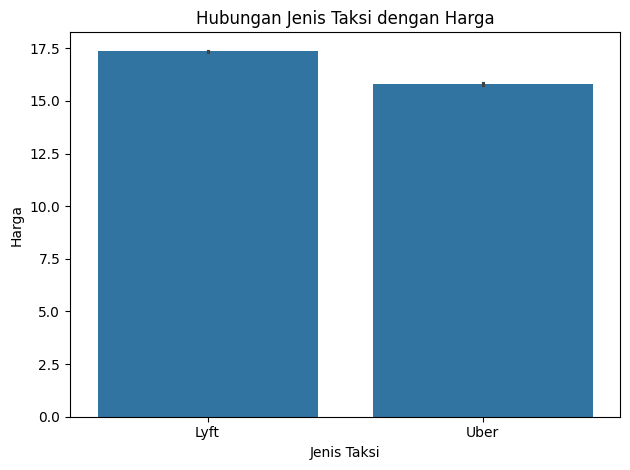

In [13]:
# Melihat Hubungan Jenis Taksi dengan harga
sns.barplot(x='cab_type', y='price', data=df)

# Menambah Title dan Label
plt.title('Hubungan Jenis Taksi dengan Harga')
plt.xlabel('Jenis Taksi')
plt.ylabel('Harga')

# Menampilkan Plot
plt.tight_layout()
plt.show()


***Insight:***

Dari tabel menunjukkan bahwa harga taksi berjenis Lyft lebih mahal daripada Uber

---

#### **Hubungan Jenis Produk Taxi dengan Harga**

---

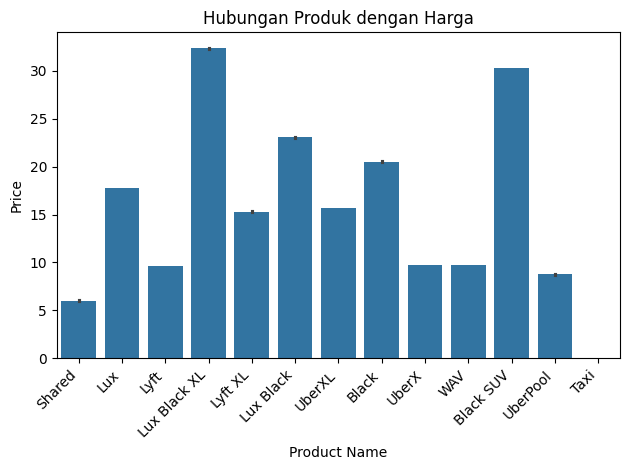

In [14]:
# Menampilan Barplot antara Hubungan Produk dengan Harga
sns.barplot(x='name', y='price', data=df)

# Menambah Title dan Label
plt.title('Hubungan Produk dengan Harga')
plt.xlabel('Product Name')
plt.ylabel('Price')

# Rotasi label x-axis 
plt.xticks(rotation=45, ha='right')

# Menampilkan Plot
plt.tight_layout()
plt.show()

In [15]:
# Menampilkan Missing Value pada Taxi
df[df["name"].isin(["Taxi"])][["name", "price"]].head(15)

,name,price
18,Taxi,NaN
31,Taxi,NaN
40,Taxi,NaN
60,Taxi,NaN
69,Taxi,NaN
82,Taxi,NaN
86,Taxi,NaN
100,Taxi,NaN
106,Taxi,NaN
111,Taxi,NaN


In [16]:
df[df["name"].isin(["Taxi"])].head(5)

,id,timestamp,hour,day,month,datetime,timezone,source,destination,cab_type,product_id,name,price,distance,surge_multiplier,latitude,longitude,temperature,apparentTemperature,short_summary,long_summary,precipIntensity,precipProbability,humidity,windSpeed,windGust,windGustTime,visibility,temperatureHigh,temperatureHighTime,temperatureLow,temperatureLowTime,apparentTemperatureHigh,apparentTemperatureHighTime,apparentTemperatureLow,apparentTemperatureLowTime,icon,dewPoint,pressure,windBearing,cloudCover,uvIndex,visibility.1,ozone,sunriseTime,sunsetTime,moonPhase,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
18,fa5fb705-03a0-4eb9-82d9-7fe80872f754,1.543674e+09,14,1,12,2018-12-01 14:13:04,America/New_York,North End,West End,Uber,8cf7e821-f0d3-49c6-8eba-e679c0ebcf6a,Taxi,NaN,1.11,1.0,42.3647,-71.0542,36.99,32.27,Partly Cloudy,Light rain in the morning and overnight.,0.0,0.0,0.68,5.87,6.26,1543672800,9.910,44.66,1543690800,35.04,1543712400,43.99,1543690800,35.69,1543712400,partly-cloudy-day,27.53,1022.32,344,0.44,1,9.910,280.1,1543665331,1543698851,0.82,0.0000,1543683600,31.71,1543658400,44.66,1543690800,28.06,1543658400,43.99,1543690800
31,eee70d94-6706-4b95-a8ce-0e34f0fa8f37,1.543795e+09,23,2,12,2018-12-02 23:52:56,America/New_York,Beacon Hill,South Station,Uber,8cf7e821-f0d3-49c6-8eba-e679c0ebcf6a,Taxi,NaN,2.48,1.0,42.3588,-71.0707,48.83,48.83,Overcast,Light rain until evening.,0.0,0.0,0.96,2.83,2.98,1543755600,7.790,50.73,1543788000,44.99,1543816800,50.06,1543788000,45.64,1543816800,cloudy,47.81,1002.81,275,1.00,0,7.790,287.3,1543751797,1543785238,0.86,0.0904,1543770000,36.45,1543726800,50.73,1543788000,35.85,1543748400,50.06,1543788000
40,7f47ff53-7cf2-4a6a-8049-83c90e042593,1.543524e+09,20,29,11,2018-11-29 20:38:05,America/New_York,North Station,Fenway,Uber,8cf7e821-f0d3-49c6-8eba-e679c0ebcf6a,Taxi,NaN,2.94,1.0,42.3661,-71.0631,42.50,36.47,Partly Cloudy,Partly cloudy throughout the day.,0.0,0.0,0.54,10.68,17.15,1543514400,9.772,44.66,1543510800,28.68,1543575600,38.30,1543510800,27.26,1543568400,partly-cloudy-day,26.84,1008.44,314,0.35,0,9.772,307.4,1543492404,1543526094,0.75,0.0000,1543510800,35.15,1543550400,44.66,1543510800,30.98,1543550400,38.30,1543510800
60,43abdbe4-ab9e-4f39-afdc-31cfa375dc25,1.544732e+09,20,13,12,2018-12-13 20:10:16,America/New_York,North End,West End,Uber,8cf7e821-f0d3-49c6-8eba-e679c0ebcf6a,Taxi,NaN,1.16,1.0,42.3647,-71.0542,33.15,30.60,Mostly Cloudy,Partly cloudy throughout the day.,0.0,0.0,0.57,3.02,3.02,1544738400,9.956,33.83,1544731200,27.27,1544781600,32.85,1544734800,24.61,1544785200,partly-cloudy-day,19.51,1033.96,96,0.81,0,9.956,330.1,1544702792,1544735599,0.21,0.0001,1544716800,18.29,1544688000,33.83,1544731200,13.79,1544688000,32.85,1544734800
69,80db1c49-9d51-4575-a4f4-1ec23b4d3e31,1.543583e+09,13,30,11,2018-11-30 13:08:03,America/New_York,North End,Beacon Hill,Uber,8cf7e821-f0d3-49c6-8eba-e679c0ebcf6a,Taxi,NaN,2.67,1.0,42.3647,-71.0542,31.80,31.80,Clear,Mostly cloudy throughout the day.,0.0,0.0,0.83,2.10,4.79,1543554000,10.000,42.52,1543600800,31.71,1543658400,40.53,1543611600,28.06,1543658400,clear-day,27.14,1017.01,296,0.01,0,10.000,277.1,1543578867,1543612470,0.79,0.0003,1543593600,28.79,1543579200,42.52,1543600800,26.41,1543575600,40.53,1543611600


***Insight:***

Dari data diketahui untuk produk dengan harga tertinggi adalah `Lux Black XL` dari Lyft sedangkan dari produk Uber yang termahal adalah `Black SUV`. Sayangnya ada produk yang memiliki nilai *missing value* yaitu `Taxi` dari Uber. 

---

#### **Hubungan Ringkasan Cuaca dengan Harga**

---

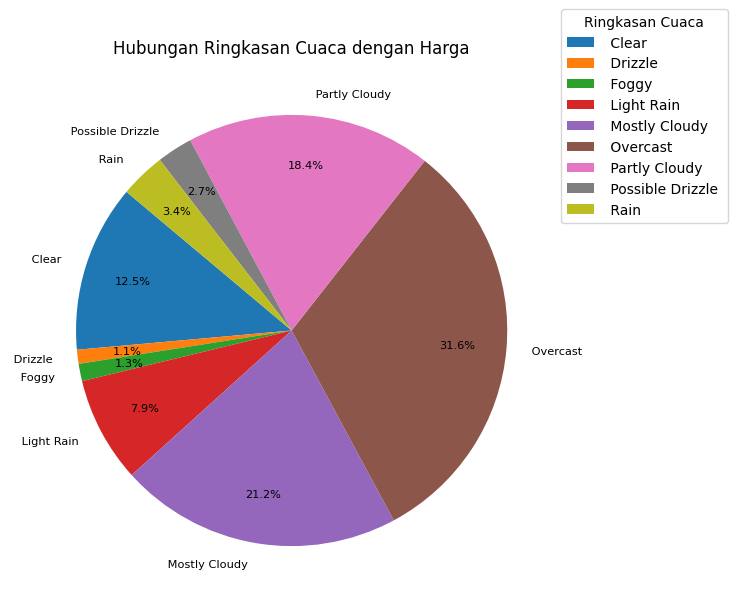

In [17]:
# Aggregasi data 
summary_data = df.groupby('short_summary')['price'].sum().reset_index()

# Membuat Pie Chart
plt.figure(figsize=(10, 7))
patches, texts, _ = plt.pie(summary_data['price'], labels=summary_data['short_summary'], autopct='%1.1f%%', startangle=140, labeldistance=1.1, pctdistance=0.77, textprops={'fontsize': 8.2})

# Menambah Legenda
plt.legend(summary_data['short_summary'], title='Ringkasan Cuaca', loc=(1, 0.7), bbox_to_anchor=(1, 0.7))

# Menambah title 
plt.title('Hubungan Ringkasan Cuaca dengan Harga')

# Menampilkan Plot
plt.show()

***Insight:***

Terdapat 3 kondisi dimana harga taxi selalu mahal yaitu saat `Overcast (berawan)`, `Mostly Cloudy (sebagian besar berawan)` dan `Partly Cloudy(Berawan)`. Data ini cukup menarik karena pada kondisi mendung dan berawan, orang-orang cenderung untuk memesan taxi dibandingkan saat hujan

---

#### **Hubungan Antara Icon dan Harga**

---

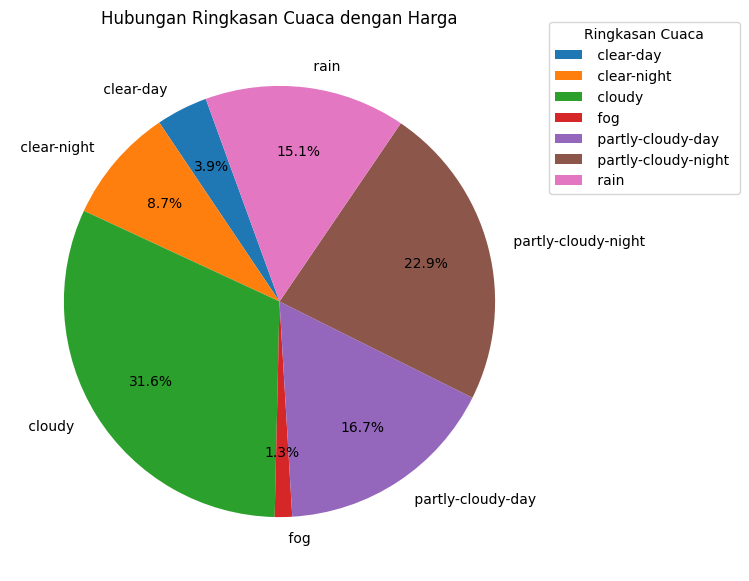

In [18]:
# Aggregasi data 
icon_data = df.groupby('icon')['price'].sum().reset_index()

# Membuat Pie Chart
plt.figure(figsize=(10, 7))
patches, texts, _ = plt.pie(icon_data['price'], labels=icon_data['icon'], autopct='%1.1f%%', startangle=110, labeldistance=1.1, pctdistance=0.70)

# Menambah Legenda
plt.legend(icon_data['icon'], title='Ringkasan Cuaca', loc=(1, 0.7), bbox_to_anchor=(1, 0.7))

# Menambah title 
plt.title('Hubungan Ringkasan Cuaca dengan Harga')

# Menampilkan Plot
plt.show()

***Insight:***

Data yang menjadi dominan adalah data `cloudy`, `partly-cloudy-day` dan `partly-cloudy-night`. Hal ini sesuai dengan *insight* sebelumnnya dimana pada kondisi mendung harga taxi akan meningkat

---

### **Cek Statistika Deskriptif**

---

In [19]:
# Melihat Informasi Statistika
df.describe()

,timestamp,hour,day,month,price,distance,surge_multiplier,latitude,longitude,temperature,apparentTemperature,precipIntensity,precipProbability,humidity,windSpeed,windGust,windGustTime,visibility,temperatureHigh,temperatureHighTime,temperatureLow,temperatureLowTime,apparentTemperatureHigh,apparentTemperatureHighTime,apparentTemperatureLow,apparentTemperatureLowTime,dewPoint,pressure,windBearing,cloudCover,uvIndex,visibility.1,ozone,sunriseTime,sunsetTime,moonPhase,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
count,6.930710e+05,693071.000000,693071.000000,693071.000000,637976.000000,693071.000000,693071.000000,693071.000000,693071.000000,693071.000000,693071.000000,693071.000000,693071.000000,693071.000000,693071.000000,693071.000000,6.930710e+05,693071.000000,693071.000000,6.930710e+05,693071.000000,6.930710e+05,693071.000000,6.930710e+05,693071.000000,6.930710e+05,693071.000000,693071.000000,693071.000000,693071.000000,693071.000000,693071.000000,693071.000000,6.930710e+05,6.930710e+05,693071.000000,693071.000000,6.930710e+05,693071.000000,6.930710e+05,693071.000000,6.930710e+05,693071.000000,6.930710e+05,693071.000000,6.930710e+05
mean,1.544046e+09,11.619137,17.794365,11.586684,16.545125,2.189430,1.013870,42.338172,-71.066151,39.584388,35.881222,0.008922,0.146076,0.741119,6.186253,8.469860,1.544049e+09,8.467970,45.040982,1.544050e+09,34.150736,1.544102e+09,41.614054,1.544050e+09,30.139824,1.544099e+09,31.656256,1010.094766,220.055853,0.686502,0.248908,8.467970,313.513635,1.544027e+09,1.544060e+09,0.579066,0.037374,1.544044e+09,33.457774,1.544042e+09,45.261313,1.544047e+09,29.731002,1.544048e+09,41.997343,1.544048e+09
std,6.891925e+05,6.948114,9.982286,0.492429,9.324359,1.138937,0.091641,0.047840,0.020302,6.726084,7.918707,0.026901,0.328938,0.138595,3.148223,5.289179,6.928244e+05,2.602888,5.996541,6.937921e+05,6.383163,6.922923e+05,7.666138,6.941699e+05,8.057468,6.927378e+05,9.142355,13.472899,99.102736,0.358534,0.474097,2.602888,27.953061,6.911393e+05,6.906634e+05,0.244705,0.055214,6.912028e+05,6.467224,6.901954e+05,5.645046,6.901353e+05,7.110494,6.871862e+05,6.936841,6.910777e+05
min,1.543204e+09,0.000000,1.000000,11.000000,2.500000,0.020000,1.000000,42.214800,-71.105400,18.910000,12.130000,0.000000,0.000000,0.380000,0.450000,0.800000,1.543151e+09,0.717000,32.680000,1.543154e+09,17.850000,1.543234e+09,22.620000,1.543187e+09,11.810000,1.543234e+09,4.390000,988.090000,2.000000,0.000000,0.000000,0.717000,269.400000,1.543147e+09,1.543181e+09,0.090000,0.000000,1.543162e+09,15.630000,1.543122e+09,33.510000,1.543154e+09,11.810000,1.543136e+09,28.950000,1.543187e+09
25%,1.543444e+09,6.000000,13.000000,11.000000,9.000000,1.280000,1.000000,42.350300,-71.081000,36.450000,31.910000,0.000000,0.000000,0.640000,3.410000,4.060000,1.543432e+09,8.432000,42.570000,1.543439e+09,30.170000,1.543489e+09,36.570000,1.543439e+09,27.700000,1.543478e+09,27.490000,999.820000,124.000000,0.370000,0.000000,8.432000,290.900000,1.543406e+09,1.543440e+09,0.300000,0.000000,1.543421e+09,30.170000,1.543399e+09,42.570000,1.543439e+09,27.760000,1.543399e+09,36.570000,1.543439e+09
50%,1.543737e+09,12.000000,17.000000,12.000000,13.500000,2.160000,1.000000,42.351900,-71.063100,40.490000,35.900000,0.000000,0.000000,0.710000,5.910000,7.550000,1.543756e+09,9.880000,44.680000,1.543788e+09,34.180000,1.543817e+09,40.950000,1.543788e+09,30.030000,1.543817e+09,30.690000,1009.250000,258.000000,0.820000,0.000000,9.880000,307.400000,1.543752e+09,1.543785e+09,0.680000,0.000400,1.543770e+09,34.240000,1.543727e+09,44.680000,1.543788e+09,30.130000,1.543745e+09,40.950000,1.543788e+09
75%,1.544828e+09,18.000000,28.000000,12.000000,22.500000,2.920000,1.000000,42.364700,-71.054200,43.580000,40.080000,0.000000,0.000000,0.880000,8.410000,11.740000,1.544846e+09,9.996000,46.910000,1.544814e+09,38.730000,1.544836e+09,44.120000,1.544818e+09

***Insight:***

Untuk analisa statistka deskriptif. Hanya dilihat sekilas perbandingan antara nilai median dan mean. Ternyata masih ada nilai median yang lebih banyak dari mean hal ini menandakan ada skewness bersifat positif. Selain itu, ditemukan juga data terdistribusi normal dan data yang memiliki nilai mean lebih banyak dibandingkan median. Hal ini menandakan adanya skewness bersifat negatif. 

---

### **Menampilkan Boxplot Untuk Setiap Kolom**

---

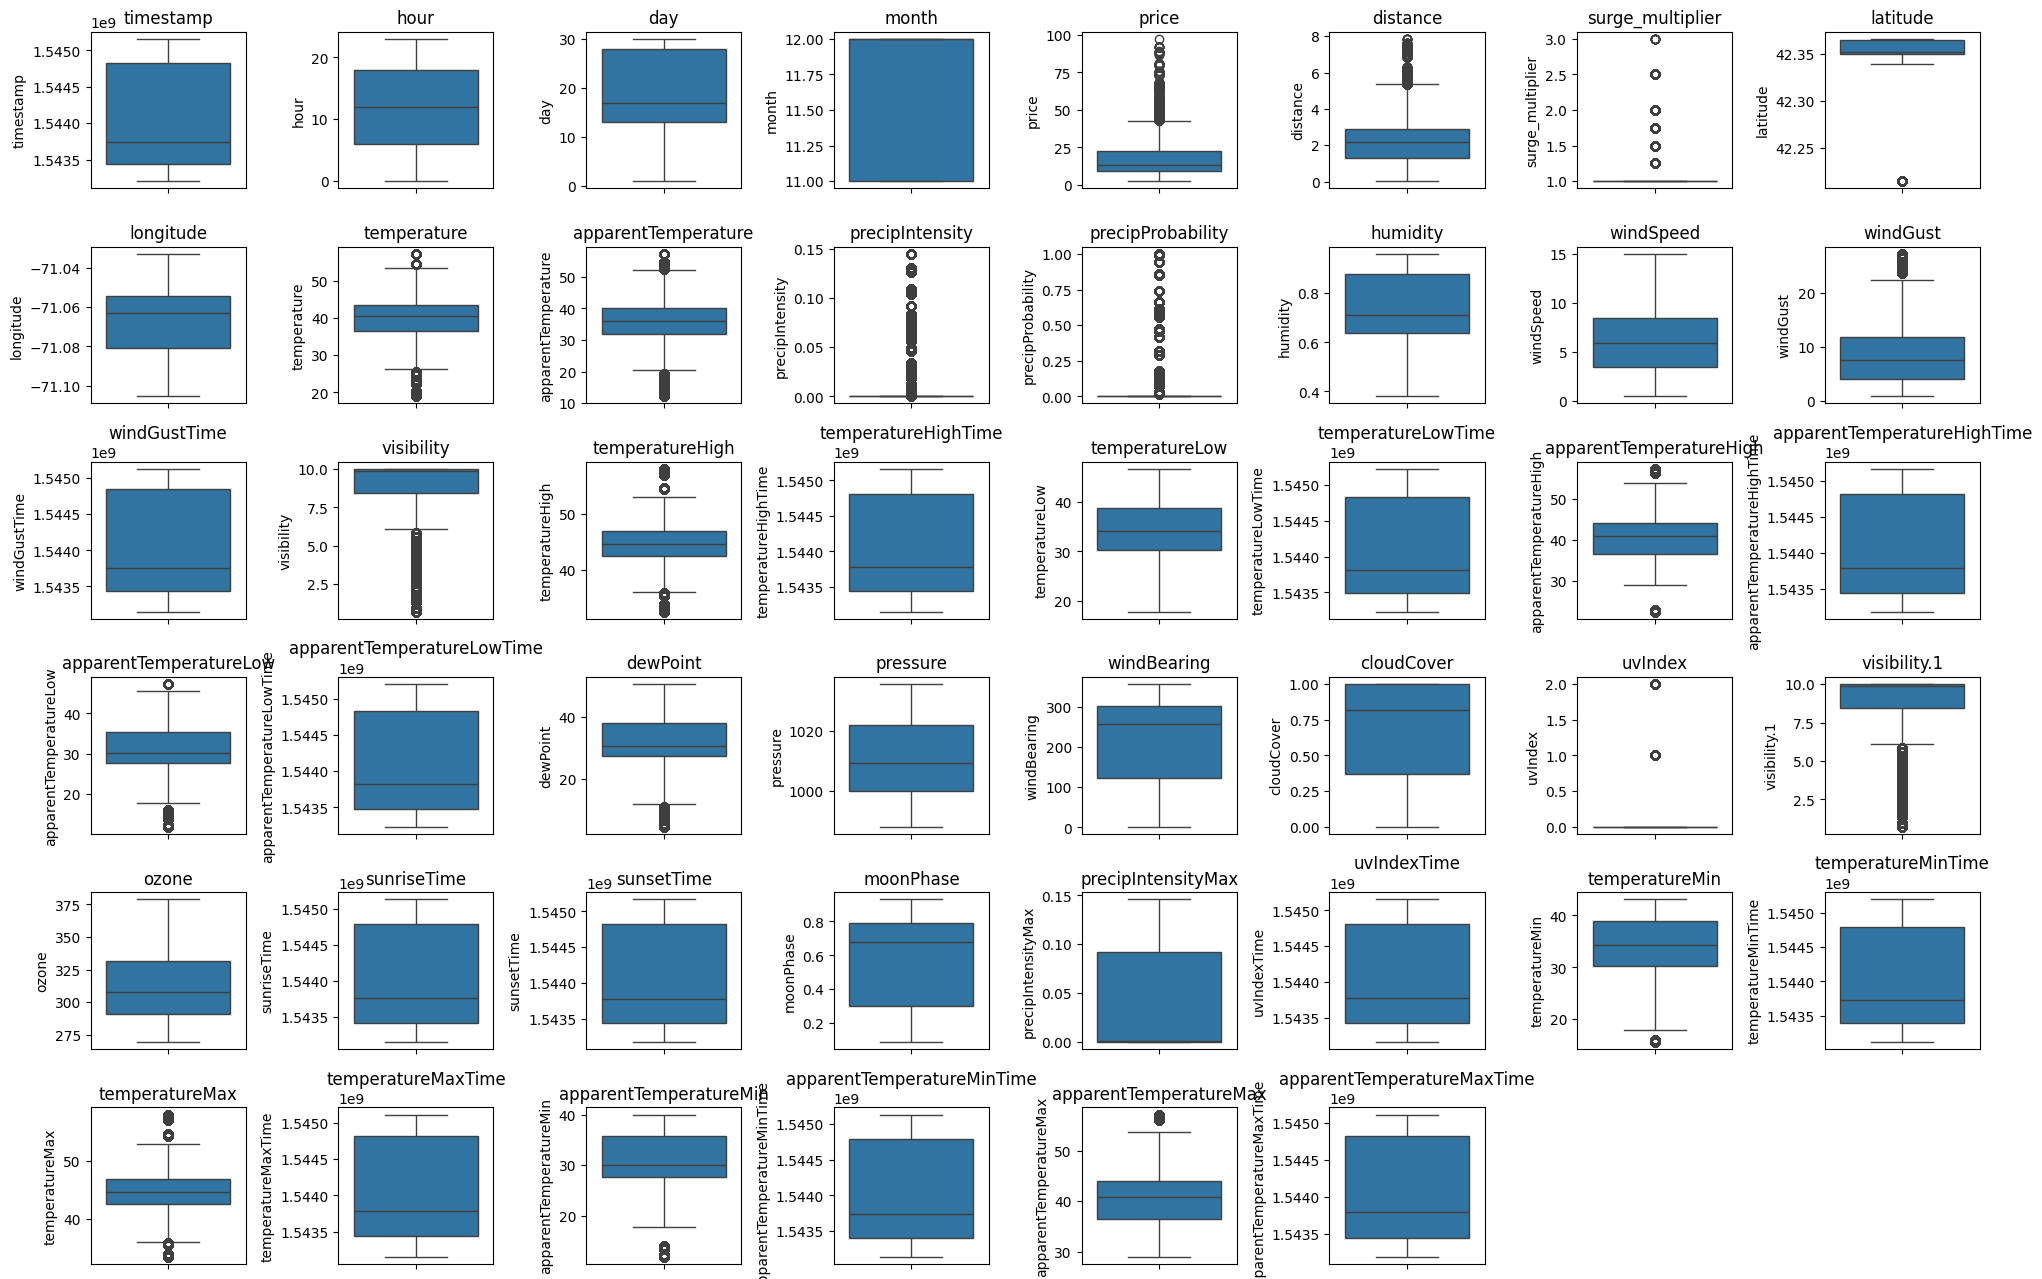

In [20]:
# Membuat Fungsi Boxplot
def boxplot_for_all_columns(df):

    # Filter hanya kolom numerik
    numeric_columns = df.select_dtypes(include=['int', 'float']).columns
    
    # Mengatur ukuran plot
    plt.figure(figsize=(20, 15))

    # Loop melalui setiap kolom numerik dan membuat box plot
    for i, column in enumerate(numeric_columns, 1):
        plt.subplot(7, 8, i)
        sns.boxplot(y=df[column])
        plt.title(column)

    plt.tight_layout()
    plt.show()

# Contoh pemanggilan fungsi
boxplot_for_all_columns(df)

***Insight:***

Bedasarkan analisa statistika deskriptif yang dicari sebelumnya untuk melihat mean dan median untuk melihat *skewness*, dilakukan pemodelan dalam bentuk gambar untuk membuktikan adanya outlier. Berikut adalah kolom yang memiliki outlier:

1. Price

2. Distance

3. Surge_multiplier

4. Latitude

5. Temperature

6. ApparentTemperature

7. Precipintensity

8. Preciprobability

9. WingGust

10. Visibility

11. TemperatureHigh

12. ApparentTemperatureHigh

13. ApparentTemperatureLow

14. Dewpoint

15. Uvvindex

16. Visibility

17. TemperatureMin

18. TemperatureMax

19. ApparentTemperatureMin

20. ApparentTemperatureMax

---

### **Melihat *Range Price*** 

---

In [21]:
# Melihat Range Price
df.price.min(), df.price.max()

(2.5, 97.5)

***Insight:***

Untuk *range* harga taxi baik dari Lyft maupun Uber memiliki harga terendah sebesar 2.5 USD sedangkan untuk harga tertinggi adalah 97.5 USD yang jika konversi ke dalam satuan rupiah didapat harga Rp 40561 dan Rp 1581879 untuk harga tertinggi. Harga yang sangat fantastis

---

## ***Feature Engineering***

---

#### ***Memisahkan Kolom Kategorikal dan Numerik*** 

---

In [22]:
# Mendapat nilai kategorik dan nilai numerik
cat_columns = df.select_dtypes(include=['object']).columns.tolist()
num_columns = df.select_dtypes(include = np.number).columns.tolist()

print('Numerical Columns: ', num_columns)
print('Categorical Columns: ', cat_columns)

Numerical Columns:  ['timestamp', 'hour', 'day', 'month', 'price', 'distance', 'surge_multiplier', 'latitude', 'longitude', 'temperature', 'apparentTemperature', 'precipIntensity', 'precipProbability', 'humidity', 'windSpeed', 'windGust', 'windGustTime', 'visibility', 'temperatureHigh', 'temperatureHighTime', 'temperatureLow', 'temperatureLowTime', 'apparentTemperatureHigh', 'apparentTemperatureHighTime', 'apparentTemperatureLow', 'apparentTemperatureLowTime', 'dewPoint', 'pressure', 'windBearing', 'cloudCover', 'uvIndex', 'visibility.1', 'ozone', 'sunriseTime', 'sunsetTime', 'moonPhase', 'precipIntensityMax', 'uvIndexTime', 'temperatureMin', 'temperatureMinTime', 'temperatureMax', 'temperatureMaxTime', 'apparentTemperatureMin', 'apparentTemperatureMinTime', 'apparentTemperatureMax', 'apparentTemperatureMaxTime']
Categorical Columns:  ['id', 'datetime', 'timezone', 'source', 'destination', 'cab_type', 'product_id', 'name', 'short_summary', 'long_summary', 'icon']


***Insight:***

Dilakukan pemisahan antara kolom numerik dan kolom kategorik yang dimana nantinya untuk dua tipe jenis data ini akan dilakukan *handling* yang berbeda.

---

### **Menghapus Kolom** 

---

In [23]:
# Melihat Kolom 
df.id.unique()

array(['424553bb-7174-41ea-aeb4-fe06d4f4b9d7',
       '4bd23055-6827-41c6-b23b-3c491f24e74d',
       '981a3613-77af-4620-a42a-0c0866077d1e', ...,
       '64d451d0-639f-47a4-9b7c-6fd92fbd264f',
       '727e5f07-a96b-4ad1-a2c7-9abc3ad55b4e',
       'e7fdc087-fe86-40a5-a3c3-3b2a8badcbda'], dtype=object)

In [24]:
# Melihat Kolom 
df.datetime.unique()

array(['2018-12-16 09:30:07', '2018-11-27 02:00:23',
       '2018-11-28 01:00:22', ..., '2018-12-17 07:15:07',
       '2018-11-30 05:23:02', '2018-11-29 17:38:01'], dtype=object)

In [25]:
# Melihat Kolom 
df.timestamp.unique()

array([1.54495261e+09, 1.54328402e+09, 1.54336682e+09, ...,
       1.54377528e+09, 1.54507051e+09, 1.54473900e+09])

In [26]:
# Melihat Kolom
df.timezone.unique() 

array(['America/New_York'], dtype=object)

In [27]:
# Melihat Kolom
df.product_id.unique() 

array(['lyft_line', 'lyft_premier', 'lyft', 'lyft_luxsuv', 'lyft_plus',
       'lyft_lux', '6f72dfc5-27f1-42e8-84db-ccc7a75f6969',
       '6c84fd89-3f11-4782-9b50-97c468b19529',
       '55c66225-fbe7-4fd5-9072-eab1ece5e23e',
       '9a0e7b09-b92b-4c41-9779-2ad22b4d779d',
       '6d318bcc-22a3-4af6-bddd-b409bfce1546',
       '997acbb5-e102-41e1-b155-9df7de0a73f2',
       '8cf7e821-f0d3-49c6-8eba-e679c0ebcf6a'], dtype=object)

In [28]:
# Menghapus Kolom High Cardinality
df = df.drop(columns=['id', 'datetime', 'timestamp'], axis=1)

In [29]:
# Menghapus Kolom Tertentu
df = df.drop(columns=['timezone', 'product_id'], axis=1)

***Insight:***

Penghapusan kolom dilakukan pada kolom `id`, `datetime`, `timestamp` dikarenakan untuk menghindari *high cardinality*. Sedangkan pada kolom `timezone` akan dilakukan penghapusan karena hanya memiliki satu data unik. `product_id` juga akan dilakukan penghapusan dikarenakan ada kesalahan input pada data.

---

### **Memisahkan nilai X dan y** 

---

In [30]:
# Memisahkan `X` and `y`

X = df.drop(['price'], axis=1)
y = df['price']
X.head(2)

,hour,day,month,source,destination,cab_type,name,distance,surge_multiplier,latitude,longitude,temperature,apparentTemperature,short_summary,long_summary,precipIntensity,precipProbability,humidity,windSpeed,windGust,windGustTime,visibility,temperatureHigh,temperatureHighTime,temperatureLow,temperatureLowTime,apparentTemperatureHigh,apparentTemperatureHighTime,apparentTemperatureLow,apparentTemperatureLowTime,icon,dewPoint,pressure,windBearing,cloudCover,uvIndex,visibility.1,ozone,sunriseTime,sunsetTime,moonPhase,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
0,9,16,12,Haymarket Square,North Station,Lyft,Shared,0.44,1.0,42.2148,-71.033,42.34,37.12,Mostly Cloudy,Rain throughout the day.,0.0000,0.0,0.68,8.66,9.17,1545015600,10.000,43.68,1544968800,34.19,1545048000,37.95,1544968800,27.39,1545044400,partly-cloudy-night,32.70,1021.98,57,0.72,0,10.000,303.8,1544962084,1544994864,0.30,0.1276,1544979600,39.89,1545012000,43.68,1544968800,33.73,1545012000,38.07,1544958000
1,2,27,11,Haymarket Square,North Station,Lyft,Lux,0.44,1.0,42.2148,-71.033,43.58,37.35,Rain,"Rain until morning, starting again in the eve...",0.1299,1.0,0.94,11.98,11.98,1543291200,4.786,47.30,1543251600,42.10,1543298400,43.92,1543251600,36.20,1543291200,rain,41.83,1003.97,90,1.00,0,4.786,291.1,1543232969,1543266992,0.64,0.1300,1543251600,40.49,1543233600,47.30,1543251600,36.20,1543291200,43.92,1543251600


In [31]:
# Menampilkan Nilai y
y.head()

0     5.0
1    11.0
2     7.0
3    26.0
4     9.0
Name: price, dtype: float64

***Insight:***

Dilakukan pemisahan pada dataframe untuk mendapatkan nilai *feature* (X) dan target / label (y) untuk dilakukan split data   

---

### ***Splitting* Dataset**

---

In [32]:
# Splitting Dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print('X_Train size : ', X_train.shape)
print('X_Test size  : ', X_test.shape)
print('y_Train size  : ', y_train.shape)
print('y_Test size  : ', y_test.shape)

X_Train size :  (554456, 51)
X_Test size  :  (138615, 51)
y_Train size  :  (554456,)
y_Test size  :  (138615,)


***Insight:***

*Splitting* dataset telah dilakukan dengan proporsi data train / test = 80 / 20 (dalam satuan persentase). Adapun digunakan random state bernilai 42

---

### ***Missing Value Handling***

---

In [33]:
# Melihat Nilai Missing Value y_train
y_train.isna().sum()

44165

In [34]:
# Melihat Nilai Missing Value y_test
y_test.isna().sum()

10930

In [35]:
# Mendapatkan indeks dari baris yang memiliki nilai hilang pada y_train
missing_indices = y_test[y_test.isnull()].index

# Menghapus baris dengan nilai yang hilang dari y_train dan X_train menggunakan indeks tersebut
y_test = y_test.drop(missing_indices)
X_test = X_test.drop(missing_indices)

In [36]:
# Mendapatkan indeks dari baris yang memiliki nilai hilang pada y_train
missing_indices = y_train[y_train.isnull()].index

# Menghapus baris dengan nilai yang hilang dari y_train dan X_train menggunakan indeks tersebut
y_train = y_train.drop(missing_indices)
X_train = X_train.drop(missing_indices)

In [37]:
# Melihat Ukuran Data
print('X_Train size : ', X_train.shape)
print('X_Test size  : ', X_test.shape)
print('y_Train size  : ', y_train.shape)
print('y_Test size  : ', y_test.shape)

X_Train size :  (510291, 51)
X_Test size  :  (127685, 51)
y_Train size  :  (510291,)
y_Test size  :  (127685,)


***Insight:***

Untuk mengatasi *missing value* umumnya dilakukan imputasi atau menghilangkan data pada kolom atau baris. Untuk kasus ini dilakukan penghapusan pada baris yang mengalami *missing value*. Penghapusan ini didasarkan pada indeks di `y_test` yang dimana nantinya akan diterapkan juga pada kolom `X_test` begitu juga pada indeks `y_train` akan menjadi acuan untuk penghapusan pada indeks `X_train`. Adapun pertimbangan mengapa menggunakan metode *drop* pada baris adalah karena nilai *missing value* berada pada label atau nilai y 

---

### ***Outlier Handling***

---

#### **Memisahkan Data Kategorik dan Numerik**

---

In [38]:
# Melakukan seleksi data kategorik
X_train_kategorik = X_train.select_dtypes(include=['object', 'bool'])
X_test_kategorik = X_test.select_dtypes(include=['object', 'bool'])

# Melakukan seleksi data numerik
X_train_numerik = X_train.select_dtypes(exclude=['object', 'bool'])
X_test_numerik = X_test.select_dtypes(exclude=['object', 'bool'])

In [39]:
# Melihat Ukuran Data 
print('X_Train Kategorik size : ', X_train_kategorik.shape)
print('X_Test Kategorik size  : ', X_test_kategorik.shape)
print('X_Train Numerik size : ', X_train_numerik.shape)
print('X_Test Numerik size  : ', X_test_numerik.shape)
print('y_Train size  : ', y_train.shape)
print('y_Test size  : ', y_test.shape)

X_Train Kategorik size :  (510291, 7)
X_Test Kategorik size  :  (127685, 7)
X_Train Numerik size :  (510291, 44)
X_Test Numerik size  :  (127685, 44)
y_Train size  :  (510291,)
y_Test size  :  (127685,)


***Insight:***

Data kategorik dan data numerik akan dilakukan karena akan dilakukan *handling* secara terpisah  

---

#### **Menampilkan Persentase Outlier**

---

In [40]:
# Fungsi Pengecekan Skewness Data
def cek_skewness(data):
    skewness_data = pd.DataFrame({'Skewness': data.skew()})
    return skewness_data

In [41]:
# Melihat Skewness 
X_train_skew = cek_skewness(X_train_numerik)
X_test_skew = cek_skewness(X_test_numerik)

In [42]:
# Fungsi Menghitung Persentase Outlier
def calculate_outlier_percentage(data):
    q1 = np.percentile(data, 25)
    q3 = np.percentile(data, 75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    outliers = data[(data < lower_bound) | (data > upper_bound)]
    outlier_percentage = (len(outliers) / len(data)) * 100
    return "{:.2f}%".format(outlier_percentage)

# Fungsi Melihat Hasil Outlier di Setiap Kolom (Data Dictionary)
def calculate_outlier_percentage_all_columns(data):
    outlier_percentage_dict = {}
    for column in data.columns:
        outlier_percentage = calculate_outlier_percentage(data[column])
        outlier_percentage_dict[column] = outlier_percentage
    return outlier_percentage_dict

In [43]:
# Menampilkan Persentase Outlier
X_train_numerik_persentase = calculate_outlier_percentage_all_columns(X_train_numerik)
X_test_numerik_persentase = calculate_outlier_percentage_all_columns(X_test_numerik)

# Membuat DataFrame dari hasil perhitungan
X_train_numerik_df = pd.DataFrame.from_dict(X_train_numerik_persentase, orient='index', columns=['Train_Outlier_Percentage_Before'])
X_test_numerik_df = pd.DataFrame.from_dict(X_test_numerik_persentase, orient='index', columns=['Test_Outlier_Percentage_Before'])
X_train_numerik_skew = X_train_skew.rename(columns={'Skewness': 'X_train Skewness_Before'})
X_test_numerik_skew = X_test_skew.rename(columns={'Skewness': 'X_test Skewness_Before'})

# Menggabungkan kedua DataFrame
merged_df = pd.concat([X_train_numerik_df, X_test_numerik_df, X_train_numerik_skew, X_test_numerik_skew], axis=1)

# Menampilkan DataFrame hasil penggabungan
merged_df

,Train_Outlier_Percentage_Before,Test_Outlier_Percentage_Before,X_train Skewness_Before,X_test Skewness_Before
hour,0.00%,0.00%,-0.046149,-0.044114
day,0.00%,0.00%,-0.375422,-0.378164
month,0.00%,0.00%,-0.351621,-0.351063
distance,1.13%,1.15%,0.819508,0.806153
surge_multiplier,3.30%,3.23%,7.939844,8.087413
latitude,12.79%,12.75%,-2.113783,-2.119383
longitude,0.00%,0.00%,-0.355556,-0.352106
temperature,5.30%,5.25%,-0.609538,-0.607852
apparentTemperature,7.72%,7.67%,-0.393788,-0.392762
precipIntensity,21.74%,21.76%,3.325166,3.339299


***Insight:***

Diperoleh data masih ada yang mengandung *outlier* pada data *test* maupun *training*. Nilai tertinggi pada ditemukan sampai sekitar 20 %. Berbeda dengan *outlier*, pada *skewness* terlihat berada di antara 0,5 dan 1 atau -1 dan 0,5 pada beberapa kolom yang menandakan data terdistribusi normal namun pada beberapa kolom masih terlihat nilai skewness lebih dari angka tersebut.

---

#### ***Capping/Sensoring* Data**

---

In [44]:
# Menghapus Kolom yang Memiliki Skewness Tinggi
X_train_numerik = X_train_numerik.drop(['surge_multiplier', 'precipIntensity', 'precipProbability', 'uvIndex'], axis=1)
X_test_numerik = X_test_numerik.drop(['surge_multiplier', 'precipIntensity', 'precipProbability', 'uvIndex'], axis=1)

In [45]:
def winsoriser(df):
    # Inisialisasi Winsorizer untuk kolom saat ini
    winsorizer = Winsorizer(
        capping_method='iqr',
        tail='both',
        fold=1.5
    )
    winsorizer2 = Winsorizer(
        capping_method='iqr',
        tail='both',
        fold=3
    )
    for column in df.columns:
        # Melakukan censoring pada data train (df)
        if (abs(df[column].skew())  <= 1) & (abs(df[column].skew()) >= 0.5):
            df[column] = winsorizer.fit_transform(df[[column]])
        else:
            df[column] = winsorizer2.fit_transform(df[[column]])
    return df

In [46]:
# Winsorizer Data
X_train_new = winsoriser(X_train_numerik)
X_test_new = winsoriser(X_test_numerik)

In [47]:
# Melihat Skewness 
X_train_skew = cek_skewness(X_train_new)
X_test_skew = cek_skewness(X_test_new)

In [48]:
# Menampilkan Persentase Outlier
X_train_numerik_winsorizer_persentase = calculate_outlier_percentage_all_columns(X_train_new)
X_test_numerik_winsorizer_persentase = calculate_outlier_percentage_all_columns(X_test_new)

# Membuat DataFrame dari hasil perhitungan
X_train_numerik_winsorizer_df = pd.DataFrame.from_dict(X_train_numerik_winsorizer_persentase, orient='index', columns=['Train_Outlier_Percentage_After'])
X_test_numerik_winsorizer_df = pd.DataFrame.from_dict(X_test_numerik_winsorizer_persentase, orient='index', columns=['Test_Outlier_Percentage_After'])
X_train_numerik_winsorizer_skew = X_test_skew.rename(columns={'Skewness': 'X_train Skewness_After'})
X_test_numerik_winsorizer_skew = X_test_skew.rename(columns={'Skewness': 'X_test Skewness_After'})

# Menggabungkan kedua DataFrame
merged_df1 = pd.concat([X_train_numerik_winsorizer_df, X_test_numerik_winsorizer_df, X_train_numerik_winsorizer_skew, X_test_numerik_winsorizer_skew], axis=1)

# Menampilkan DataFrame hasil penggabungan
merged_df1

,Train_Outlier_Percentage_After,Test_Outlier_Percentage_After,X_train Skewness_After,X_test Skewness_After
hour,0.00%,0.00%,-0.044114,-0.044114
day,0.00%,0.00%,-0.378164,-0.378164
month,0.00%,0.00%,-0.351063,-0.351063
distance,0.00%,0.00%,0.583817,0.583817
latitude,12.79%,12.75%,-1.491413,-1.491413
longitude,0.00%,0.00%,-0.352106,-0.352106
temperature,0.00%,0.00%,-0.317712,-0.317712
apparentTemperature,7.72%,7.67%,-0.392762,-0.392762
humidity,0.00%,0.00%,-0.077317,-0.077317
windSpeed,0.00%,0.00%,0.451097,0.451097


In [49]:
# Merge DataFrame 
gabungan = pd.concat([merged_df, merged_df1], axis=1)
gabungan

,Train_Outlier_Percentage_Before,Test_Outlier_Percentage_Before,X_train Skewness_Before,X_test Skewness_Before,Train_Outlier_Percentage_After,Test_Outlier_Percentage_After,X_train Skewness_After,X_test Skewness_After
hour,0.00%,0.00%,-0.046149,-0.044114,0.00%,0.00%,-0.044114,-0.044114
day,0.00%,0.00%,-0.375422,-0.378164,0.00%,0.00%,-0.378164,-0.378164
month,0.00%,0.00%,-0.351621,-0.351063,0.00%,0.00%,-0.351063,-0.351063
distance,1.13%,1.15%,0.819508,0.806153,0.00%,0.00%,0.583817,0.583817
surge_multiplier,3.30%,3.23%,7.939844,8.087413,NaN,NaN,NaN,NaN
latitude,12.79%,12.75%,-2.113783,-2.119383,12.79%,12.75%,-1.491413,-1.491413
longitude,0.00%,0.00%,-0.355556,-0.352106,0.00%,0.00%,-0.352106,-0.352106
temperature,5.30%,5.25%,-0.609538,-0.607852,0.00%,0.00%,-0.317712,-0.317712
apparentTemperature,7.72%,7.67%,-0.393788,-0.392762,7.72%,7.67%,-0.392762,-0.392762
precipIntensity,21.74%,21.76%,3.325166,3.339299,NaN,NaN,NaN,NaN


***Insight:***

Dilakukan *drop* pada kolom tertentu diakibatkan tingginya *outlier* maupun *skewness*. Adapun kolom yang dihilangkan adalah sebagai berikut:

- `surge_multiplier` 

-  `precipIntensity`

-  `precipProbability`

-  `uvIndex`

Setelah dilakukan *capping*, ditemukan pada beberapa kolom berhasil menurunkan *outlier* dan *skewnes* walau tidak signifikan.

---

### ***Feature Selection***

---

### ***Interpretasi Korelasi***

---

In [50]:
# Inisiasi Kolom
p_values = []
interpretasi = []
cols = []

# Try-Except Untuk Uji Korelasi X_train
for col in X_train_new.columns:
    corr_coef, p_value = stats.spearmanr(X_train_new[col], y_train)

    p_values.append(p_value)
    cols.append(col)

    if p_value < 0.05:
        interpretasi.append('ada korelasi')
    else :
        interpretasi.append('tidak ada korelasi')

# Membuat Dataframe untuk Melihat Hasil Korelasi
result_df = pd.DataFrame({'Feature': cols, 'P-Value': p_values, 'Interpretasi': interpretasi})
result_df

,Feature,P-Value,Interpretasi
0,hour,0.795944,tidak ada korelasi
1,day,0.465845,tidak ada korelasi
2,month,0.864857,tidak ada korelasi
3,distance,0.000000,ada korelasi
4,latitude,0.233448,tidak ada korelasi
5,longitude,0.969611,tidak ada korelasi
6,temperature,0.981271,tidak ada korelasi
7,apparentTemperature,0.939015,tidak ada korelasi
8,humidity,0.494717,tidak ada korelasi
9,windSpeed,0.498472,tidak ada korelasi


In [51]:
# Inisiasi Kolom
p_values = []
interpretasi = []
cols = []

# Try-Except Untuk Uji Korelasi X_train
for col in X_train_kategorik.columns:
    corr_coef, p_value = stats.kendalltau(X_train_kategorik[col], y_train)

    p_values.append(p_value)
    cols.append(col)

    if p_value < 0.05:
        interpretasi.append('ada korelasi')
    else :
        interpretasi.append('tidak ada korelasi')

# Membuat Dataframe untuk Melihat Hasil Korelasi
result_df = pd.DataFrame({'Feature': cols, 'P-Value': p_values, 'Interpretasi': interpretasi})
result_df

,Feature,P-Value,Interpretasi
0,source,5.197415e-37,ada korelasi
1,destination,6.895493e-226,ada korelasi
2,cab_type,0.000000e+00,ada korelasi
3,name,0.000000e+00,ada korelasi
4,short_summary,7.915531e-01,tidak ada korelasi
5,long_summary,4.521781e-01,tidak ada korelasi
6,icon,1.374001e-01,tidak ada korelasi


***Insight:***

Sebelum dilakukan pemodelan, akan dilakukan kembali eliminasi bedasarkan adanya korelasi dengan label atau nilai y. Untuk yang tidak mengalami korelasi akan dilakukan penghapusan pada kolom yang bersangkutan. Kolom yang tersisa akan dicoba untuk dilakukan pemodelan. Namun, dari data terlihat bahwa hampir semua kolom tidak mengalami korelasi selain `distance` pada kolom numerik sedangkan pada kolom kategorik masih terdapat *feature* yang mengalami korelasi. Oleh sebab itu, akan dilakukan percobaan dengan menggunakan semua *feature*


---

### ***Menggabungkan Data Numerik dan Kategorik***

---

In [52]:
# Mendapat nilai kategorik dan nilai numerik
cat_columns = X_train_kategorik.select_dtypes(include=['object']).columns.tolist()
num_columns = X_train_new.select_dtypes(include = np.number).columns.tolist()

print('Numerical Columns: ', num_columns)
print('Categorical Columns: ', cat_columns)

Numerical Columns:  ['hour', 'day', 'month', 'distance', 'latitude', 'longitude', 'temperature', 'apparentTemperature', 'humidity', 'windSpeed', 'windGust', 'windGustTime', 'visibility', 'temperatureHigh', 'temperatureHighTime', 'temperatureLow', 'temperatureLowTime', 'apparentTemperatureHigh', 'apparentTemperatureHighTime', 'apparentTemperatureLow', 'apparentTemperatureLowTime', 'dewPoint', 'pressure', 'windBearing', 'cloudCover', 'visibility.1', 'ozone', 'sunriseTime', 'sunsetTime', 'moonPhase', 'precipIntensityMax', 'uvIndexTime', 'temperatureMin', 'temperatureMinTime', 'temperatureMax', 'temperatureMaxTime', 'apparentTemperatureMin', 'apparentTemperatureMinTime', 'apparentTemperatureMax', 'apparentTemperatureMaxTime']
Categorical Columns:  ['source', 'destination', 'cab_type', 'name', 'short_summary', 'long_summary', 'icon']


In [53]:
# Menggabungkan Nilai Kategorik dengan Numerik
X_train_overall = pd.concat([X_train_new, X_train_kategorik], axis=1)
X_test_overall = pd.concat([X_test_new, X_test_kategorik], axis=1)

In [54]:
# Melihat Ukuran Data
print('X_Train size : ', X_train_overall.shape)
print('X_Test size  : ', X_test_overall.shape)
print('y_Train size  : ', y_train.shape)
print('y_Test size  : ', y_test.shape)

X_Train size :  (510291, 47)
X_Test size  :  (127685, 47)
y_Train size  :  (510291,)
y_Test size  :  (127685,)


***Insight:***

Nilai numerik yang telah dilakukan *capping* akan digabungkan dengan data kategorik yang nantinya akan digunakan sebagai input data untuk pemodelan. Dilakukan juga pengambilan kolom pada data numerik dan data kategorik yang nantinya akan digunakan untuk model *saving*

---

### ***Scalling & Encoding***

---

In [55]:
# Menentukan Jenis Scalling 
scaler = RobustScaler()

In [56]:
# Inisiasi Encoder
ohe = OneHotEncoder()

***Insight:***

Pada permodelan ini akan digunakan *scalling* berupa Robust Scaler. Alasan pemilihan *scale* ini adalah karena ketahanannya terhadap *outlier*. Hal ini erat kaitannya dengan nilai data yang masih memiliki outlier. Sedangkan untuk *encoding* akan digunakan one-hot encoder. Alasan menggunakan *encoder* ini adalah karena pada data kategorik memiliki sifat nominal kategorik. *Scale* dan *Encoding* nantinya akan digunakan pada model dengan bantuan *pipeline*

---

## **Model *Definition***

---

#### ***Linear Regression***

---

In [57]:
# Numeric Pipeline
num_pipeline = make_pipeline(RobustScaler(), PCA(n_components=0.95))

# Categorical Pipeline
cat_pipeline = make_pipeline(OneHotEncoder(handle_unknown="ignore"))

# Creating Column Transformer
preprocessing_pipeline = ColumnTransformer([
    ('num', num_pipeline, num_columns),
    ('cat', cat_pipeline, cat_columns)
])

# Full Pipeline
full_pipeline = make_pipeline(preprocessing_pipeline, LinearRegression())

# Tuning Parameters with GridSearchCV
param_grid = {
    'linearregression__fit_intercept': [True, False]
}

grid_Linear_Regression = GridSearchCV(full_pipeline, param_grid, cv=6)

***Insight:***

Didesain model untuk *linear regression* dengan menggunakan *hyperparameter* dan *pipeline*. Model ini akan mengikutsertakan *scaling* dan *encoding8 yang sudah didefenisikan sebelumnya. `Fit intercept` digunakan sebagai *hyperparemeter* yang dimana model akan mengestimasi *intercept* atau tidak. Jika nilainya *True* maka regresi linear akan mencari nilai optimal untuk *intercept* selain koefisien untuk variabel independen selain itu apabila nilainya *false* model akan mengasumsikan bahwa garis regresi melewati titik asal (0,0). Pada model ini akan dilakukan PCA untuk mereduksi dimensi data.

---

## **Model *Training***

---

In [58]:
# Fit Model
grid_Linear_Regression.fit(X_train_overall, y_train)

GridSearchCV(cv=6,
             estimator=Pipeline(steps=[('columntransformer',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('robustscaler',
                                                                                          RobustScaler()),
                                                                                         ('pca',
                                                                                          PCA(n_components=0.95))]),
                                                                         ['hour',
                                                                          'day',
                                                                          'month',
                                                                          'distance',
                                                                          'latitude',
                                                                          'longitude',
                                                                          'temperature',
                                                                          'apparentTemperature',
                                                                          'humidity',
                                                                          'windSpeed',
                                                                          'windGust',
                                                                          'windGustTime',
                                                                          'visibility',
                                                                          'temperatur...
                                                                          'cloudCover',
                                                                          'visibility.1',
                                                                          'ozone',
                                                                          'sunriseTime',
                                                                          'sunsetTime',
                                                                          'moonPhase', ...]),
                                                                        ('cat',
                                                                         Pipeline(steps=[('onehotencoder',
                                                                                          OneHotEncoder(handle_unknown='ignore'))]),
                                                                         ['source',
                                                                          'destination',
                                                                          'cab_type',
                                                                          'name',
                                                                          'short_summary',
                                                                          'long_summary',
                                                                          'icon'])])),
                                       ('linearregression',
                                        LinearRegression())]),
             param_grid={'linearregression__fit_intercept': [True, False]})

In [59]:
# Mendapatakan Parameter Terbaik dan Score Terbaik
best_params = grid_Linear_Regression.best_params_
best_score = grid_Linear_Regression.best_score_
print("Best Parameters:", best_params)
print("Best Score:", round(best_score,3))

Best Parameters: {'linearregression__fit_intercept': False}
Best Score: 0.895


In [60]:
# Mendapatkan model terbaik dari grid search
best_linear_reg_model = grid_Linear_Regression.best_estimator_

# Mendapatkan intercept
intercept = best_linear_reg_model.named_steps['linearregression'].intercept_
print("Intercept:", intercept)

# Mendapatkan koefisien
coefs = best_linear_reg_model.named_steps['linearregression'].coef_
print("Coefficients:", coefs)

Intercept: 0.0
Coefficients: [-1.16537649e-03  1.62654463e-03  7.33786493e-03  1.50664923e-03
 -9.25805887e-03 -3.41029830e-02  1.93717002e-03  8.95143659e-02
  4.98643234e+00 -3.03489419e-01  4.82174814e-02  1.39816615e+00
  7.90673520e-01  9.06992005e-01  1.15430520e+00  1.46274995e+00
  1.45684824e+00  1.55703342e+00  9.41561677e-01  9.53806147e-01
  1.36121665e+00  1.74553101e+00  9.49904941e-01  1.16435859e+00
  8.18424229e-01  1.10192570e+00  7.72704919e-01  1.54230612e+00
  1.50975115e+00  1.35302635e+00  1.33600942e+00  1.27958651e+00
  1.27159261e+00  1.42938468e+00  1.09971861e+00  7.99424574e+00
  6.68454315e+00  5.84405132e+00  1.56082233e+01  1.75506952e+00
  7.05071012e+00  1.63164668e+01 -6.41425784e+00 -7.19372056e-01
 -9.99437083e+00 -5.92525829e+00 -4.92142274e+00  9.94957037e-01
 -4.91600752e+00  2.84339142e+00  8.67920756e-01  2.10969266e+00
  8.27858213e-01  2.13049180e+00  2.10037942e+00  2.12988223e+00
  8.45535665e-01  8.23636727e-01  1.28920428e+00  1.31470027e

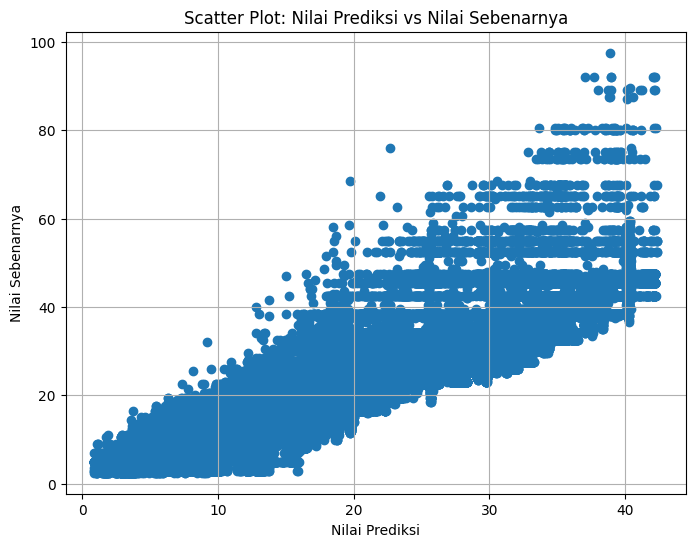

In [61]:
# Mengambil nilai prediksi dari model terbaik
y_pred = grid_Linear_Regression.best_estimator_.predict(X_train_overall)

# Membuat scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(y_pred, y_train)
plt.xlabel('Nilai Prediksi')
plt.ylabel('Nilai Sebenarnya')
plt.title('Scatter Plot: Nilai Prediksi vs Nilai Sebenarnya')
plt.grid(True)
plt.show()

***Insight:***

Setelah model ini dilakukan *training*, ditemukan bahwa:

- `Best Parameters: 'linearregression__fit_intercept'`: False. Hal ini mengindikasikan bahwa model menganggap garis regresi melewati titik asal (0,0) atau dianggap tidak memiliki *intercept*

- `Best Score: 0.895`. Hal ini mengindikasikan bahwa akurasi model ini untuk memprediksi data sebesar 89,5 % 

- Model tidak memiliki *intercept* seperti dipaparkan di atas yang berarti pada saat nilai *feature* bernilai 0 atau tidak memberikan dampak, maka nilai prediksi akan bernilai 0 juga

- Koefisien yang bernilai negatif akan memberikan makna bahwa tidak ada hubungan signifikan antara *feature* dengan label. Sementara untuk yang bernilai positif, akan memberikan makna bahwa ada hubungan signifikan antara *feature* dengan label. Sedangkan untuk nilai yang besar menunjukkan bahwa *feature* tersebut memiliki pengaruh besar terhadap label. Sebaliknya, jika nilai kecil bahkan mendekati nol  menunjukkan bahwa *feature* tersebut tidak memiliki pengaruh besar terhadap label

- Hasil pemodelan ataupun prediksi akan divisualiasikan menggunakan *scatterplot*. Dari gambar ditunjukkan bahwa hasil menunjukkan pola seperti garis miring yang menandakan model berbentuk linear. Garis miring ini menanjak ke atas yang berarti ada pengaruh positif antara *feature* dengan label. Hal ini berarti jika *feature* meningkat, maka semakin meningkat juga nilai labelnya.  

---

## **Model *Evaluation***

---

### **Menghitung Nilai (MAE), (MSE), (RMSE) dan (R<sup>2</sup> Score)**

---

In [62]:
# Prediksi Train-Set and Test-Set
y_pred_train = grid_Linear_Regression.predict(X_train_overall)
y_pred_test = grid_Linear_Regression.predict(X_test_overall)

In [63]:
# Model Evaluation
print('MAE - Train Set  : ', mean_absolute_error(y_train, y_pred_train))
print('MAE - Test Set   : ', mean_absolute_error(y_test, y_pred_test))
print('')

print('MSE - Train Set  : ', mean_squared_error(y_train, y_pred_train))
print('MSE - Test Set   : ', mean_squared_error(y_test, y_pred_test))
print('')

print('RMSE - Train Set : ', root_mean_squared_error(y_train, y_pred_train))
print('RMSE - Test Set  : ', root_mean_squared_error(y_test, y_pred_test))
print('')

print('R2 Score - Train Set : ', r2_score(y_train, y_pred_train))
print('R2 Score - Test Set  : ', r2_score(y_test, y_pred_test))
print('')

MAE - Train Set  :  1.928126822461447
MAE - Test Set   :  1.9185608500326594

MSE - Train Set  :  9.118837776941136
MSE - Test Set   :  9.010427109816858

RMSE - Train Set :  3.0197413427214483
RMSE - Test Set  :  3.001737348572799

R2 Score - Train Set :  0.8951664149718679
R2 Score - Test Set  :  0.8961697666748241



***Insight:***

- MAE dan RMSE menunjukkan bahwa kesalahan prediksi rata-rata model. Pada model ini diperoleh nilai yang kecil. Pada nilai *train set* dan *test set* ditemukan nilai yang tidak jauh berbeda. Hal ini menunjukkan bahwa model memiliki performa yang baik dan tidak *overfitting*.

- MSE mengkonfirmasi temuan dari MAE dan RMSE, tetapi lebih menekankan pada adanya outlier karena kesalahan dikuadratkan.

- R² Score memiliki nilai yang tinggi, di atas 80 %, menunjukkan bahwa model mampu menjelaskan sebagian besar variabilitas dalam data.

---

### ***Multivariate Normality Check***

---

In [64]:
# Nilai Residuals
y_test_residuals = y_test - y_pred_test
y_test_residuals

441132   -0.839281
274010   -1.132495
194181   -1.570503
197807    3.383197
553729    0.477857
            ...   
251723   -2.141915
145644   -2.170425
148136    2.017732
284581   -2.434138
292845   -1.640326
Name: price, Length: 127685, dtype: float64

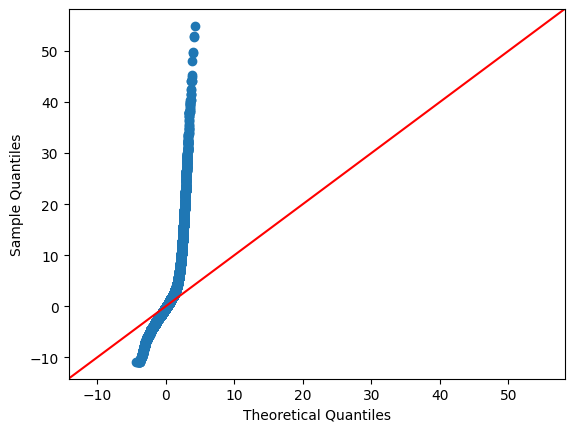

In [65]:
# Menampilkan QQ plot
sm.qqplot(y_test_residuals, line ='45')
plt.show()

***Insight:***

Dari visualisasi QQ plot yang diberikan, kuantil sampel secara signifikan menyimpang dari kuantil teoretis. Hal ini menunjukkan bahwa data tidak terdistribusi normal. Titik-titik membentuk kurva yang menyimpang ke atas, menunjukkan adanya *outlier* atau ekor kanan yang berat. Pada konteks ini sudah sesuai dengan analisa *outlier* yang dijelaskan sebelumnya 

---

### ***Auto-Correlation Check***

---

In [66]:
# Durbin-Watson Test 
round(durbin_watson(y_test_residuals), 3)

1.998

***Insight:***

*Auto-Correlation* mengacu pada asumsi bahwa tidak ada korelasi antara nilai-nilai residual dari model regresi pada observasi yang berbeda. Dengan kata lain, nilai-nilai residual dari observasi satu tidak berkorelasi dengan nilai-nilai residual dari observasi lainnya. Hasil ini penting untuk menunjukkan apakah prediksi mengalami bias atau tidak. Selain itu, dari perhitungan ini dapat ditentukan apakah ada tren atau musiman pada data. Nilai 1.998 pada Durbin Watson menunjukkan sedikit kecenderungan *positive serial correlation*, tetapi nilainya masih cukup dekat dengan 2, sehingga dapat dianggap sebagai nilai normal atau dapat dikatakan `No Autocorrelation`.

---

### ***Homoscedasticity Check***

---

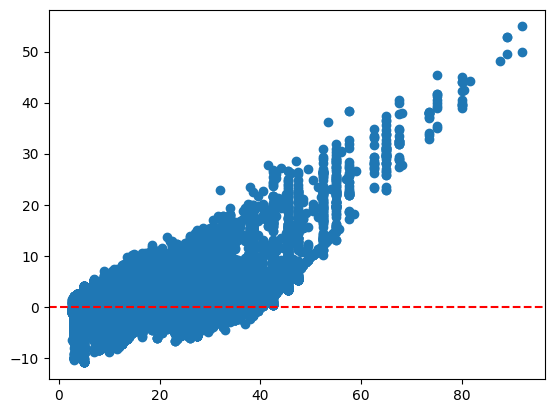

In [67]:
# Menampilkan Homoscedasticioty
plt.scatter(y_test, y_test_residuals)
plt.axhline(y = 0, color = 'r', linestyle = '--')
plt.show()

***Insight:***

*Homoscedasticity* menunjukkan  sebaran nilai-nilai residual relatif konstan saat variabel independen berubah. Dalam visualiasi, pola yang diinginkan adalah yang merata dan tanpa ada pola tertentu yang mengindikasikan perubahan variabilitas sepanjang sumbu nilai prediktor. Ketika sebuah model menunjukkan *homoscedasticity*, ini menandakan bahwa variabilitas kesalahan prediksi tidak berubah secara signifikan sepanjang rentang nilai prediktor, yang memenuhi asumsi yang penting dalam banyak analisis statistik, terutama dalam regresi linier. Asumsi *homoscedasticity* penting karena memastikan bahwa estimasi koefisien regresi adalah efisien dan konsisten, dan memungkinkan untuk melakukan inferensi statistik yang akurat. Pada model ini terlihat awalnya pola berbentuk *homoscedasticity* kemudian perlahan-lahan pola ini cenderung naik yang berarti ada *heteroskedastisitas* sehingga asumsi ini dilanggar

---

## **Model *Saving***

---

In [68]:
# Menyimpan File
with open('best_pipe.pkl', 'wb') as file_1: # wb = write binary
    pickle.dump(grid_Linear_Regression, file_1)
with open('num_col.txt', 'w') as file_2: # wb = write binary
    json.dump(num_columns,file_2)
with open('cat_col.txt', 'w') as file_3: # wb = write binary
    json.dump(cat_columns,file_3)

---

## **Model *Inference***

---


#### **Membuka File**

---

In [69]:
# Loading File
with open('best_pipe.pkl', 'rb') as file_1: # wb = write binary
    best_pipe = pickle.load(file_1)
with open('num_col.txt', 'r') as file_2: # wb = write binary
    num_col = json.load(file_2)
with open('cat_col.txt', 'r') as file_3: # wb = write binary
    cat_col = json.load(file_3)

#### **Membuat & Memprediksi Data *Inference***

---

In [70]:
# Membuat Data Inference
df_inf = {
 'hour': [9, 4],
 'day': [16, 27],
 'month': [12, 2],
 'distance': [4.63, 5.26],
 'latitude': [42.232, 42.318],
 'longitude': [-71.123, -71.323],
 'temperature': [35.84, 54.23],
 'apparentTemperature': [41.25, 31.12],
 'humidity': [0.46, 0.83],
 'windSpeed': [5.05,  3.58],
 'windGust': [2.41,  5.37],
 'windGustTime': [1545015600, 1543291200],
 'visibility': [4.49,  1.535],
 'temperatureHigh': [43.12, 22.55],
 'temperatureHighTime': [1543939200, 1543942800],
 'temperatureLow': [23.15, 23.53],
 'temperatureLowTime': [1543464000, 1545138000],
 'apparentTemperatureHigh': [43.21, 43.17],
 'apparentTemperatureHighTime': [43.21, 43.17],
 'apparentTemperatureLow':  [36.93, 29.29],
 'apparentTemperatureLowTime' : [1543557600, 1544947200],
 'dewPoint': [29.15, 38.76],
 'pressure': [33.59, 15.46],
 'windBearing': [64,  19],
 'cloudCover': [0.16, 0.58],
 'visibility.1':[ 4.031,  9.588],
 'ozone': [376.8, 301.7],
 'sunriseTime': [1544356962, 1544357003],
 'sunsetTime':  [1543180615, 1543180617],
 'moonPhase': [0.72, 0.33],
 'precipIntensityMax': [1.215e-01, 8.700e-03],
 'uvIndexTime': [1544374800, 1544634000],
 'temperatureMin': [39.71, 27.21],
 'temperatureMinTime': [1543665600, 1544673600],
 'temperatureMax': [37.92, 41.39],
 'temperatureMaxTime': [1545076800, 1544896800],
 'apparentTemperatureMin': [27.88, 20.55],
 'apparentTemperatureMinTime': [1544342400, 1543136400],
 'apparentTemperatureMax': [50.11, 43.87], 
 'apparentTemperatureMaxTime': [1543600800, 1543435200],
 'source': ['Theatre District', 'West End'],
 'destination': ['Back Bay', 'North End'],
 'cab_type': ['Lyft', 'Uber'],
 'name': ['Black SUV', 'UberPool'],
 'short_summary':  [' Rain ', ' Clear '],
 'long_summary': [' Possible drizzle in the morning. ', ' Rain in the morning and afternoon. '],
 'icon':[' partly-cloudy-night ', ' rain ']
}

df_inf = pd.DataFrame(df_inf)

In [71]:
# Menampilkan Data Inference
df_inf

,hour,day,month,distance,latitude,longitude,temperature,apparentTemperature,humidity,windSpeed,windGust,windGustTime,visibility,temperatureHigh,temperatureHighTime,temperatureLow,temperatureLowTime,apparentTemperatureHigh,apparentTemperatureHighTime,apparentTemperatureLow,apparentTemperatureLowTime,dewPoint,pressure,windBearing,cloudCover,visibility.1,ozone,sunriseTime,sunsetTime,moonPhase,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime,source,destination,cab_type,name,short_summary,long_summary,icon
0,9,16,12,4.63,42.232,-71.123,35.84,41.25,0.46,5.05,2.41,1545015600,4.490,43.12,1543939200,23.15,1543464000,43.21,43.21,36.93,1543557600,29.15,33.59,64,0.16,4.031,376.8,1544356962,1543180615,0.72,0.1215,1544374800,39.71,1543665600,37.92,1545076800,27.88,1544342400,50.11,1543600800,Theatre District,Back Bay,Lyft,Black SUV,Rain,Possible drizzle in the morning.,partly-cloudy-night
1,4,27,2,5.26,42.318,-71.323,54.23,31.12,0.83,3.58,5.37,1543291200,1.535,22.55,1543942800,23.53,1545138000,43.17,43.17,29.29,1544947200,38.76,15.46,19,0.58,9.588,301.7,1544357003,1543180617,0.33,0.0087,1544634000,27.21,1544673600,41.39,1544896800,20.55,1543136400,43.87,1543435200,West End,North End,Uber,UberPool,Clear,Rain in the morning and afternoon.,rain


In [72]:
# Memisahkan Kategori Kolom Kategori dan Numerical
df_inf_num = df_inf[num_columns]
df_inf_cat = df_inf[cat_columns]

In [73]:
# Memprediksikan Menggunakan Model Terbaik
y_pred_inf = best_pipe.predict(df_inf)
print('Price:',y_pred_inf)

Price: [39.80402555 21.48454729]


***Insight:***

Telah berhasil dilakukan *inference* pada suatu data random. Dari hasil data random, ditemukan harga taxi berdasarkan kondisi yang telah ditentukan pada *feature inference*

---

## **Kesimpulan**

---

Kesimpulan yang diperoleh dari analisis data ini adalah sebagai berikut:

- Model regresi linear berhasil dibentuk menggunakan pipeline dengan *hyperparameter fit intercept*. Parameter terbaik yang ditemukan adalah ketika *fit intercept* bernilai *False*.

- RMSE yang dihasilkan dari model ini bernilai rendah, yaitu sekitar 3, sedangkan pada R² diperoleh nilai 89,5%. Pada data train dan test ditemukan nilai yang tidak jauh berbeda, yang menandakan tidak ada *overfitting*.

- Nilai QQ plot yang divisualisasikan menunjukkan bahwa data tidak terdistribusi normal, yang ditandai dengan kurva yang menyimpang ke atas.

- Nilai Durbin Watson yang diperoleh mendekati 2, yang berarti tidak ada *Auto Correlation*.

- Visualisasi *homoscedasticity* dilakukan dan hasilnya menunjukkan bahwa data hasil pemodelan mengindikasikan adanya *heteroskedastisitas*.

- Dari sudut pandang bisnis perusahaan, menyimpulkan bahwa cuaca tidak berpengaruh signifikan terhadap tarif taksi dari Uber dan Lyft berarti perusahaan dapat fokus pada faktor-faktor yang lebih mempengaruhi penetapan harga, seperti jarak tempuh, lokasi penjemputan, tujuan, jenis kendaraan, dan nama layanan. Hal ini memungkinkan perusahaan untuk mengoptimalkan strategi penetapan harga berdasarkan analisis data yang lebih akurat terhadap faktor-faktor ini. Dengan memperhatikan parameter-parameter ini, perusahaan dapat mengambil langkah-langkah yang lebih tepat untuk menarik pelanggan dengan harga yang kompetitif, serta meningkatkan kepuasan pelanggan dengan menawarkan layanan yang sesuai dengan preferensi mereka.

---



#